In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pooch
import pygmt
import xarray as xr
import rioxarray

In [2]:
figs_dir = Path("..") / "figs"

In [3]:
dark_mode = True

if dark_mode:
    color = "white"
else:
    color = "black"

pygmt.config(
    FONT_ANNOT=f"11p,Helvetica,{color}",
    FONT_TITLE=f"12p,Helvetica,{color}",
    FONT_LABEL=f"10p,Helvetica,{color}",
    MAP_TITLE_OFFSET="0p",
    MAP_FRAME_WIDTH="2p",
)


Source of the magnetic global grid: https://www.ncei.noaa.gov/products/earth-magnetic-model-anomaly-grid-2

EMAG2v3 Source GeoTIFFs

In [4]:
emag2v3_url = "https://www.ngdc.noaa.gov/geomag/data/EMAG2/EMAG2_V3_UpCont_DataTiff.tif"
hash = "719db9d060a423b7292f09fa4312e7d0ebd4e284ba652079b34e3d05be5a370a"
fname = pooch.retrieve(url=emag2v3_url, known_hash=hash, progressbar=True)
fname

'/home/santi/.cache/pooch/8679c647668b8691725c3422b78b5d89-EMAG2_V3_UpCont_DataTiff.tif'

In [5]:
mag = rioxarray.open_rasterio(fname)
mag

<xarray.DataArray (band: 1, y: 5399, x: 10800)>
[58309200 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 359.9 360.0
  * y            (y) float64 89.97 89.93 89.9 89.87 ... -89.9 -89.93 -89.97
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [6]:
mag = mag.sel(band=1).drop("band").drop("spatial_ref")
mag

<xarray.DataArray (y: 5399, x: 10800)>
[58309200 values with dtype=float32]
Coordinates:
  * x        (x) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 359.9 360.0
  * y        (y) float64 89.97 89.93 89.9 89.87 ... -89.87 -89.9 -89.93 -89.97
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [7]:
mag.values[mag.values < -3e28] = np.nan
mag

<xarray.DataArray (y: 5399, x: 10800)>
array([[ -99.178406,  -99.173134,  -99.167854, ...,  -99.19581 ,  -99.1899  ,
         -99.184006],
       [ -97.34229 ,  -97.325645,  -97.309006, ...,  -97.39105 ,  -97.37488 ,
         -97.3587  ],
       [ -96.164795,  -96.13412 ,  -96.10345 , ...,  -96.24937 ,  -96.22168 ,
         -96.193985],
       ...,
       [ -34.207455,  -34.301018,  -34.531914, ...,  -34.511127,  -34.288982,
         -34.203697],
       [ -97.63399 ,  -97.78419 ,  -98.031525, ...,  -98.01078 ,  -97.77203 ,
         -99.45509 ],
       [-101.30384 , -101.44309 , -101.68868 , ..., -101.49767 , -101.31349 ,
         -98.1574  ]], dtype=float32)
Coordinates:
  * x        (x) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 359.9 360.0
  * y        (y) float64 89.97 89.93 89.9 89.87 ... -89.87 -89.9 -89.93 -89.97
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [8]:
mag = mag.rename(x="longitude", y="latitude")
mag

<xarray.DataArray (latitude: 5399, longitude: 10800)>
array([[ -99.178406,  -99.173134,  -99.167854, ...,  -99.19581 ,  -99.1899  ,
         -99.184006],
       [ -97.34229 ,  -97.325645,  -97.309006, ...,  -97.39105 ,  -97.37488 ,
         -97.3587  ],
       [ -96.164795,  -96.13412 ,  -96.10345 , ...,  -96.24937 ,  -96.22168 ,
         -96.193985],
       ...,
       [ -34.207455,  -34.301018,  -34.531914, ...,  -34.511127,  -34.288982,
         -34.203697],
       [ -97.63399 ,  -97.78419 ,  -98.031525, ...,  -98.01078 ,  -97.77203 ,
         -99.45509 ],
       [-101.30384 , -101.44309 , -101.68868 , ..., -101.49767 , -101.31349 ,
         -98.1574  ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 360.0
  * latitude   (latitude) float64 89.97 89.93 89.9 89.87 ... -89.9 -89.93 -89.97
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [9]:
longitude_360 = mag.longitude.values
longitude = longitude_360.copy()
longitude[longitude_360 > 180] -= 360
longitude
mag = mag.assign_coords(longitude=longitude)
mag

<xarray.DataArray (latitude: 5399, longitude: 10800)>
array([[ -99.178406,  -99.173134,  -99.167854, ...,  -99.19581 ,  -99.1899  ,
         -99.184006],
       [ -97.34229 ,  -97.325645,  -97.309006, ...,  -97.39105 ,  -97.37488 ,
         -97.3587  ],
       [ -96.164795,  -96.13412 ,  -96.10345 , ...,  -96.24937 ,  -96.22168 ,
         -96.193985],
       ...,
       [ -34.207455,  -34.301018,  -34.531914, ...,  -34.511127,  -34.288982,
         -34.203697],
       [ -97.63399 ,  -97.78419 ,  -98.031525, ...,  -98.01078 ,  -97.77203 ,
         -99.45509 ],
       [-101.30384 , -101.44309 , -101.68868 , ..., -101.49767 , -101.31349 ,
         -98.1574  ]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 89.97 89.93 89.9 89.87 ... -89.9 -89.93 -89.97
  * longitude  (longitude) float64 0.0 0.03333 0.06667 ... -0.06667 -0.03333
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [10]:
mag = mag.sortby("latitude").sortby("longitude")
mag

<xarray.DataArray (latitude: 5399, longitude: 10800)>
array([[ -78.35266 ,  -77.32873 ,  -76.80678 , ...,  -82.64139 ,  -81.211815,
         -79.78224 ],
       [ -66.164406,  -65.059875,  -64.03594 , ...,  -69.06091 ,  -68.09541 ,
         -67.129906],
       [  -1.564387,   -0.878665,   -0.160563, ...,   -5.604454,   -4.257765,
          -2.911076],
       ...,
       [-111.68008 , -111.688065, -111.695854, ..., -111.65546 , -111.66382 ,
        -111.6721  ],
       [-108.05732 , -108.0617  , -108.06616 , ..., -108.044464, -108.04869 ,
        -108.05295 ],
       [-103.08136 , -103.082184, -103.083275, ..., -103.07984 , -103.080124,
        -103.08053 ]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -89.97 -89.93 -89.9 ... 89.9 89.93 89.97
  * longitude  (longitude) float64 -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [11]:
downsample_factor = 4
mag_downsampled = mag.sel(
    longitude=slice(None, None, downsample_factor),
    latitude=slice(None, None, downsample_factor)
)
mag_downsampled

<xarray.DataArray (latitude: 1350, longitude: 2700)>
array([[ -78.35266 ,  -75.96375 ,  -79.491135, ..., -106.292725,  -93.191536,
         -84.07097 ],
       [  10.907536,   10.097365,    3.907201, ...,  -27.939352,   -7.100385,
           1.468542],
       [  31.620136,   28.514751,   12.061878, ...,  -18.056152,    1.398028,
          15.662444],
       ...,
       [-111.22631 , -111.617584, -112.00185 , ..., -109.82308 , -110.29687 ,
        -110.77085 ],
       [-118.81024 , -118.85862 , -118.91203 , ..., -118.826035, -118.81648 ,
        -118.80689 ],
       [-111.68008 , -111.71144 , -111.742615, ..., -111.5801  , -111.61361 ,
        -111.64709 ]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -89.97 -89.83 -89.7 ... 89.63 89.77 89.9
  * longitude  (longitude) float64 -180.0 -179.9 -179.7 ... 179.6 179.7 179.9
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

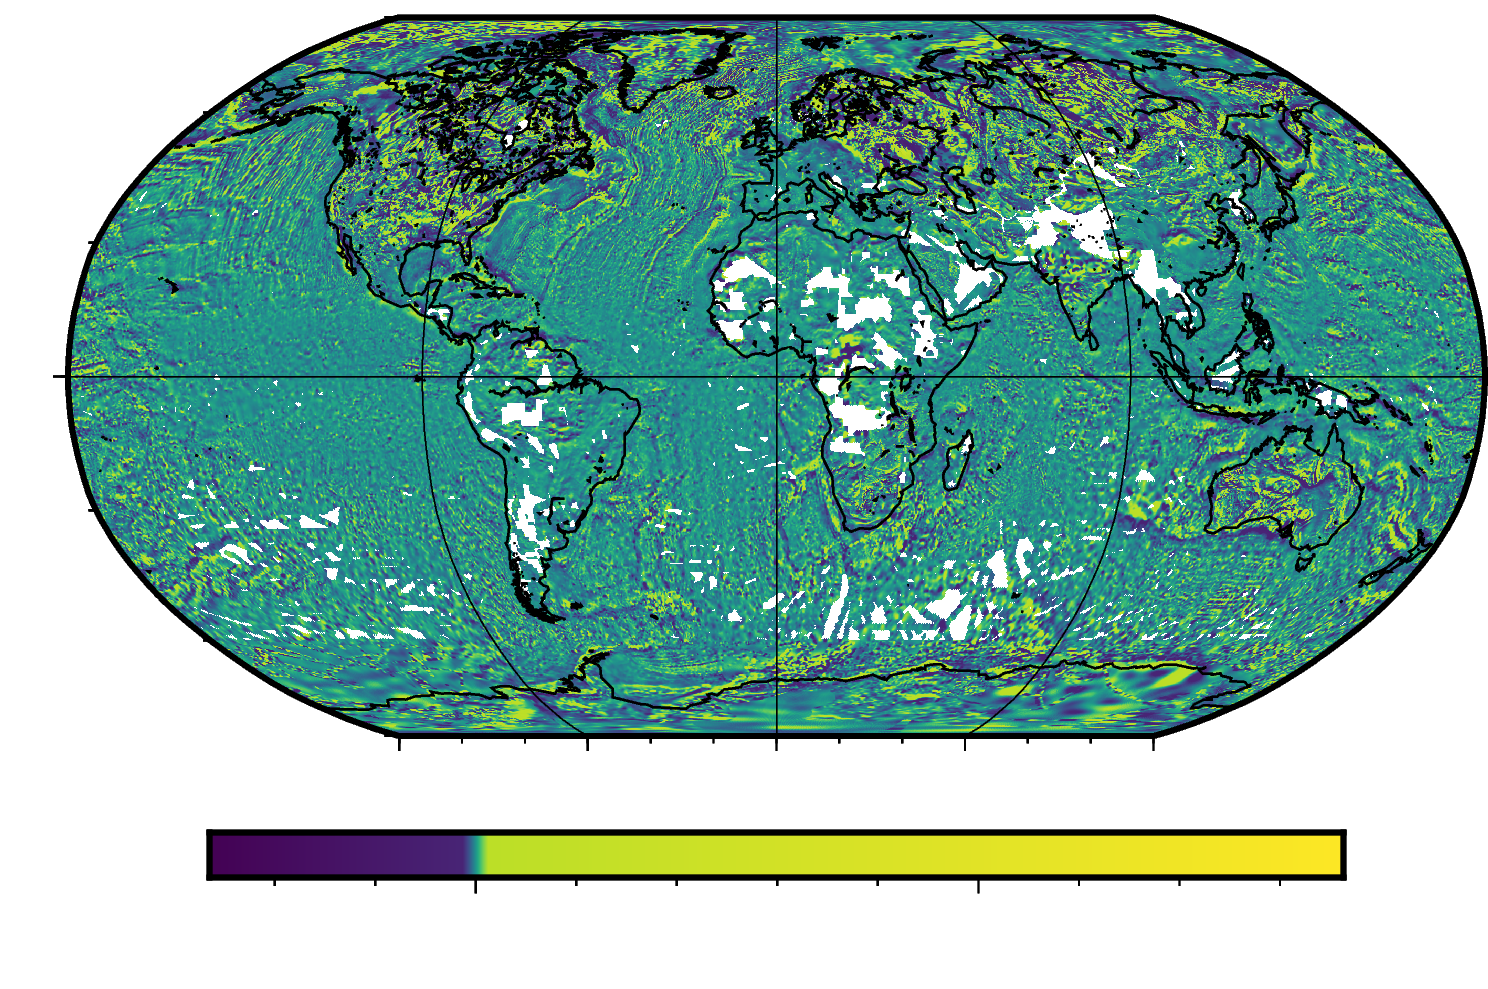

In [12]:
# Make a plot of data using PyGMT
gmt_projection = "N12c"
fig = pygmt.Figure()

pygmt.grd2cpt(grid=mag_downsampled, cmap="viridis", continuous=True)

fig.coast(
    water="white",
    land="white",
    region="d",
    projection=gmt_projection,
    resolution="crude",
)
fig.grdimage(
    mag_downsampled,
    region="d",
    projection=gmt_projection,
    frame="afg",
    shading="+a45+n10",
    cmap=True,
    nan_transparent=True,
)
fig.coast(shorelines="0.5p,black", resolution="crude")
fig.colorbar(cmap=True, frame=["af", "x+lnT"])
fig.savefig(figs_dir / "earth-mag.png", dpi=300, transparent=True)
fig.show()

## Mid ocean ridges

In [13]:
region = (-65, 0, 40, 60)  # W, E, S, N

In [14]:
west, east, south, north = region
mag_ridges = mag.sel(longitude=slice(west, east), latitude=slice(south, north))
mag_ridges

<xarray.DataArray (latitude: 600, longitude: 1951)>
array([[ -4.222426,  -0.703088,  -0.632585, ...,  36.460346,  43.663517,
         51.56434 ],
       [ -4.634933,  -2.31396 ,  -2.89395 , ...,  43.990627,  50.85262 ,
         58.10941 ],
       [ -8.793881,  -7.357606,  -8.114792, ...,  49.378204,  55.511703,
         61.639763],
       ...,
       [-21.084307,   2.037781,  26.306551, ..., -25.138847, -28.889885,
        -33.166313],
       [-24.577944,  -1.095089,  23.616777, ..., -16.219555, -20.419828,
        -25.094566],
       [-26.83723 ,  -6.43709 ,  14.577862, ...,  -4.024339,  -8.179138,
        -12.756462]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 40.0 40.03 40.07 40.1 ... 59.9 59.93 59.97
  * longitude  (longitude) float64 -65.0 -64.97 -64.93 ... -0.06667 -0.03333 0.0
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

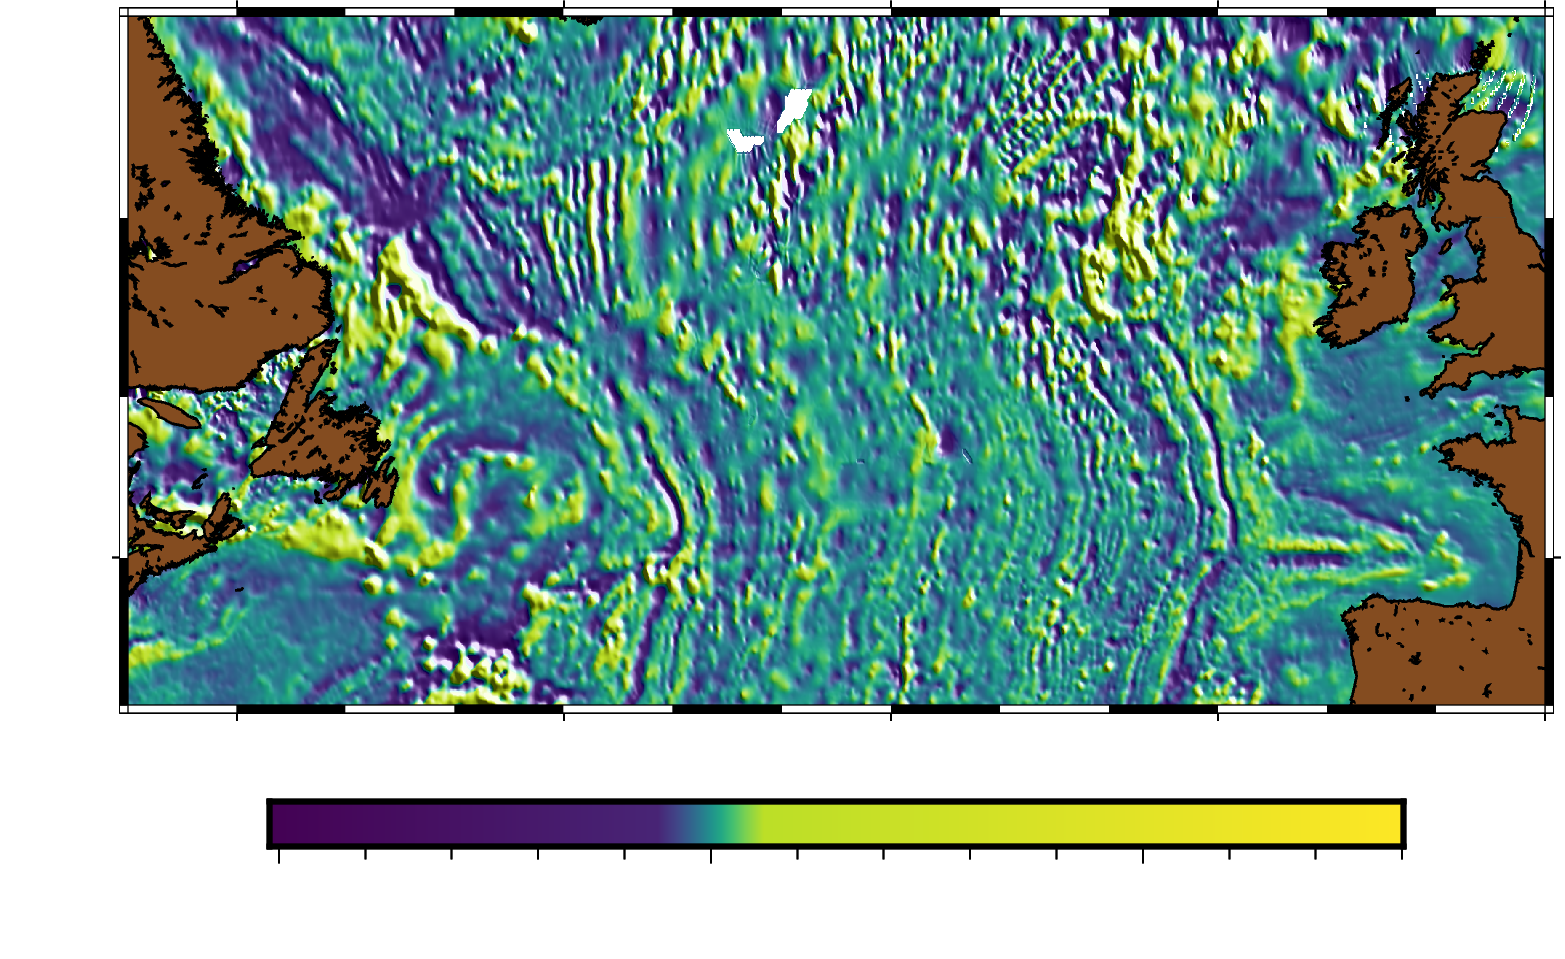

In [15]:
gmt_projection = "M12c"

fig = pygmt.Figure()
pygmt.grd2cpt(mag_ridges, cmap="viridis", continuous=True)
fig.grdimage(
    mag_ridges,
    projection=gmt_projection,
    shading="+a45+n15",
    cmap=True,
    nan_transparent=True,
)
fig.coast(shorelines="0.5p,black", land="#844c20", resolution="intermediate")
fig.basemap(frame=True)
fig.colorbar(frame='af+l"nT"')
fig.savefig(figs_dir / "ridge-mag.png", dpi=300, transparent=True)
fig.show()